<a href="https://colab.research.google.com/github/analyst-rhie/Kaggle/blob/main/python_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%B2%98%EB%A6%AC_%EC%97%B0%EC%8A%B5%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Training을 통한 기본 코드 훈련

* 프로세스
  1. 데이터셋 확인
  2. 탐색적 데이터 분석
  3. Feature engineering
  4. model 만들기
  5. 모델 학습 및 예측
  6. 모델 평가

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

* 1. read_csv 로 파일을 불러와라.

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/타이타닉/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/타이타닉/test.csv')

* 2. head()로 데이터 형태를 파악해라

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* describe() 메소드로 각 변수의 통계치를 반환해라

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* mano 라이브러리를 이용햇 null data를 시각화하여 파악해라

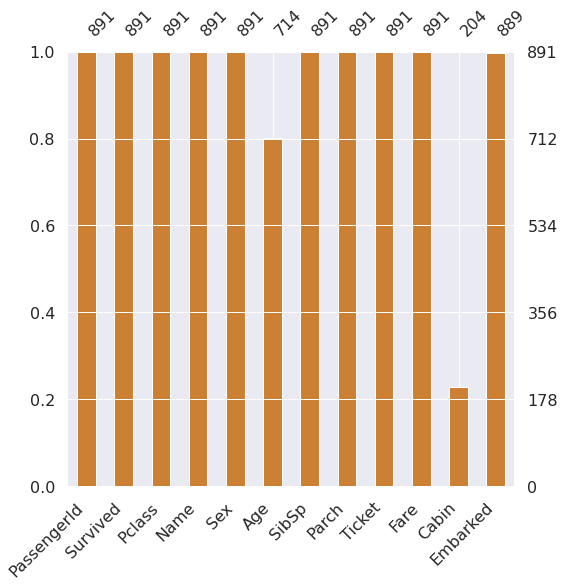

In [ ]:
msno.bar(df = df_train.iloc[:,:],figsize=(8,8), color=(0.8,0.5,0.2))

* for문, isnull을 이용해 train과 test가 각 컬럼당 NaN값이 얼만큼 있는지 %로 출력(print)하게 하라

In [ ]:
 print('============ train ===========')
for i in df_train.columns :
  ms_s = 100*round((df_train[i].isnull().sum()/df_train[i].shape[0]),3) # shape는 행의 갯수 반환
  print(f'{i}'+ ' is '+ f'{ms_s}'+'%' )
 
 print('\n============ test ===========')

 for i in df_test.columns :
  ms_s = 100*round((df_test[i].isnull().sum()/df_test[i].shape[0]),3) # shape는 행의 갯수 반환
  print(f'{i}'+ ' is '+ f'{ms_s}'+'%' )


============ train ===========
PassengerId is 0.0%
Survived is 0.0%
Pclass is 0.0%
Name is 0.0%
Sex is 0.0%
Age is 19.900000000000002%
SibSp is 0.0%
Parch is 0.0%
Ticket is 0.0%
Fare is 0.0%
Cabin is 77.10000000000001%
Embarked is 0.2%

============ test ===========
PassengerId is 0.0%
Pclass is 0.0%
Name is 0.0%
Sex is 0.0%
Age is 20.599999999999998%
SibSp is 0.0%
Parch is 0.0%
Ticket is 0.0%
Fare is 0.2%
Cabin is 78.2%
Embarked is 0.0%


* 타겟의 빈도표와 빈도 테이블을 작성하라.
  * data를 이때 matplotlib를 사용하며 원과 바 그래프가 반드시 포함되어야 한다. 
  * 또한 두 그래프는 하나로 묶여 있어야 한다.
  * 각 그래프는 title이 존재한다.

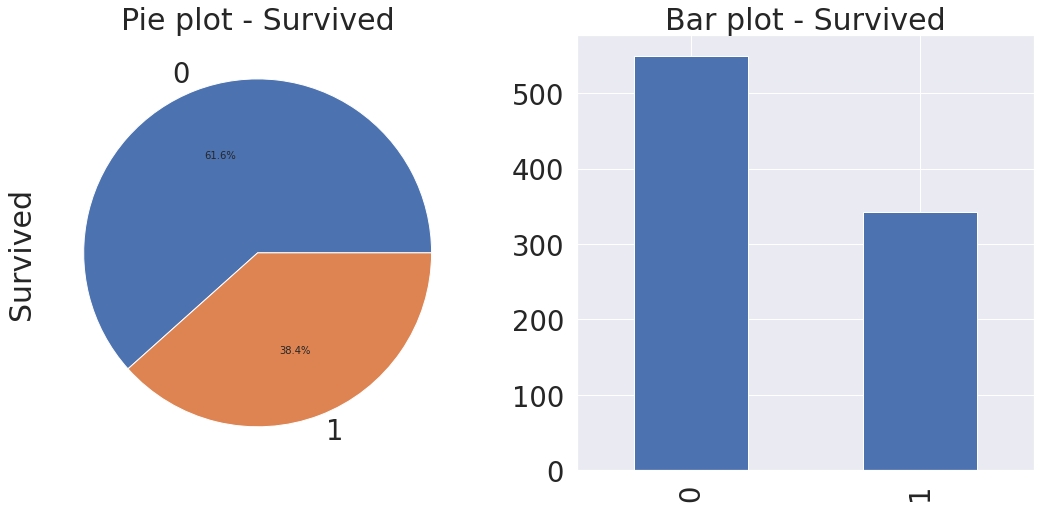

* Pclass(좌석 클래스)의 순서형 변수와 Survived(생존 유무)의 명목형 변수의 교차표를 만들고 각 행, 열별 합계를 구하라
  * 이때 pandas의 crosstab을 이용하라




Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* Pclass(좌석 클래스)의 순서형 변수와 Survived(생존 유무)의 명목형 변수에서 생존한 사람의 수를 좌석 클래스 별로 구해라

Survived    891
dtype: int64

* 성별(Sex)별 생존(Survived)와 클래스(Pclass)두 순서,명목 변수의 그래프를 그려라
  * factor plot을 그려야 하며 sns 패키지를 이용해라.

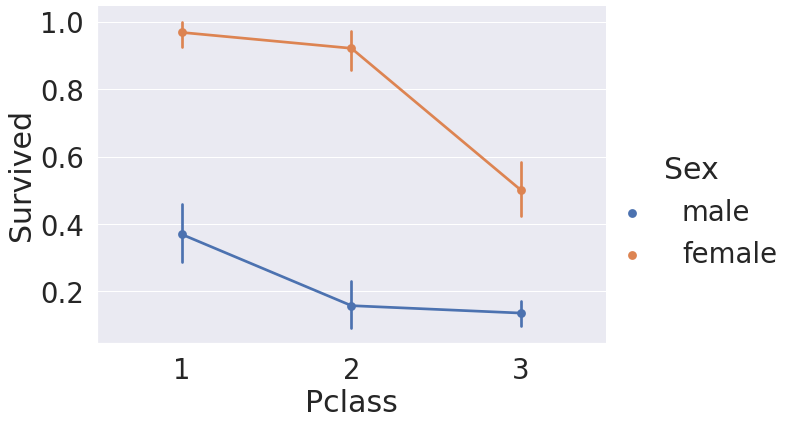

* 연속형 변수인 연령(Age)와 명목형변수별(Survived)의 히스토그램을 그려라
  * sns의 패키지를 이용해라
  * 범례 표시는 Survived =1, Survived = 0으로 표기하라
  * matplotlib 패키지를 이용해서 그래프를 하나로 표현하

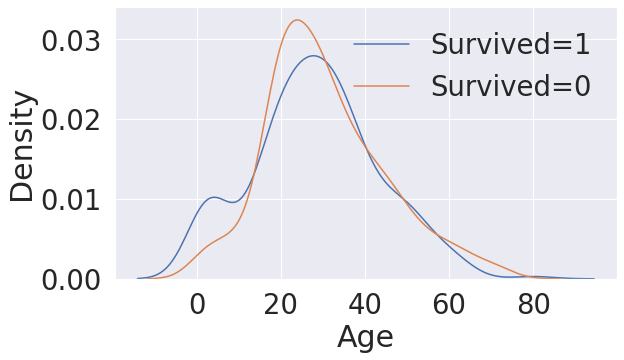

* 나이와 생존율에 따른 누적 그래프를 그려라.
  * xlabel, ylabel을 Survival rage, Range of Age(0~x) 로 지정해줘라
  * Tip. 나이별 누적값을 우선생성 한후 이를 그래프로 그려라.

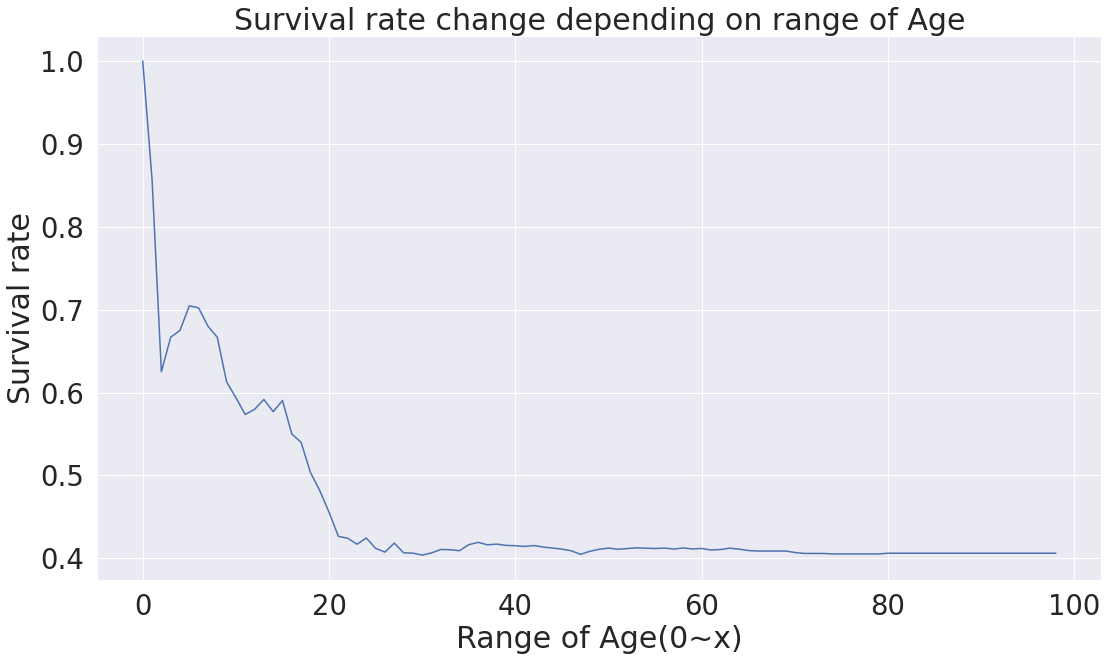

* Pclass, Sex의 숫자, 명목형 변수를 Age를 y축으로 하여 한눈에 시각화 하여라
  * seaborn의 violinplot을 활용해라

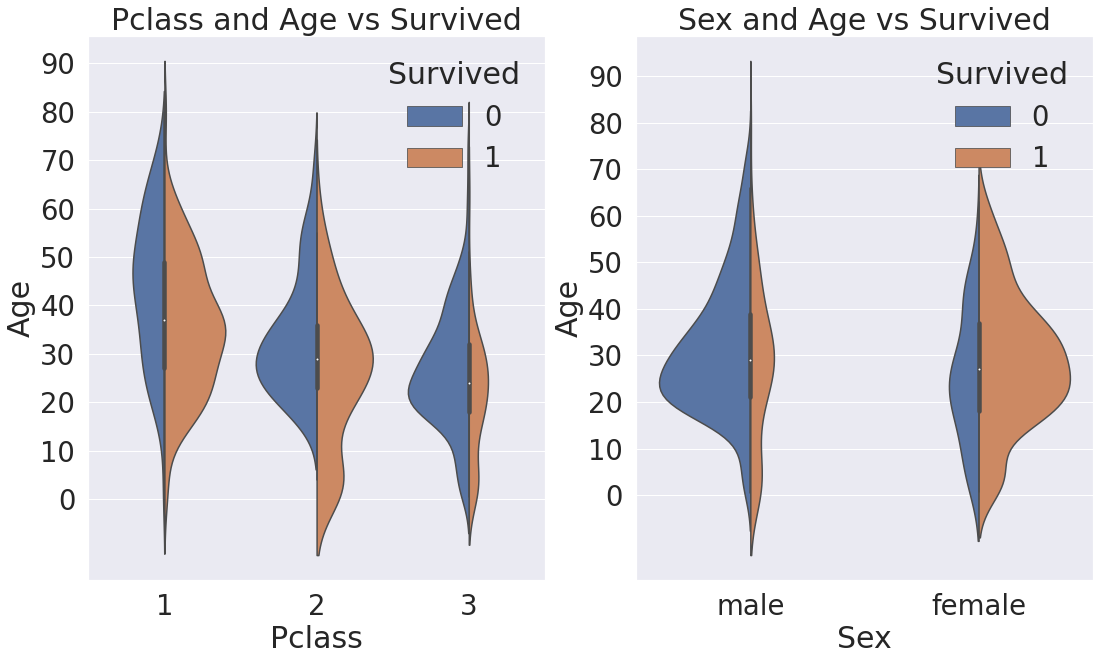

* 부모(Parch) + 자녀(SibSp) + 나자신(1)을 더해 'Familysize' 이름의 변수를 생성하시 

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Family_size, dtype: float64

* fare의 결측값을 평균으로 치환하

* Fare 변수를 sns 패키지로 분포를 그리고 log를 취해 분포를 하나 더 그려라

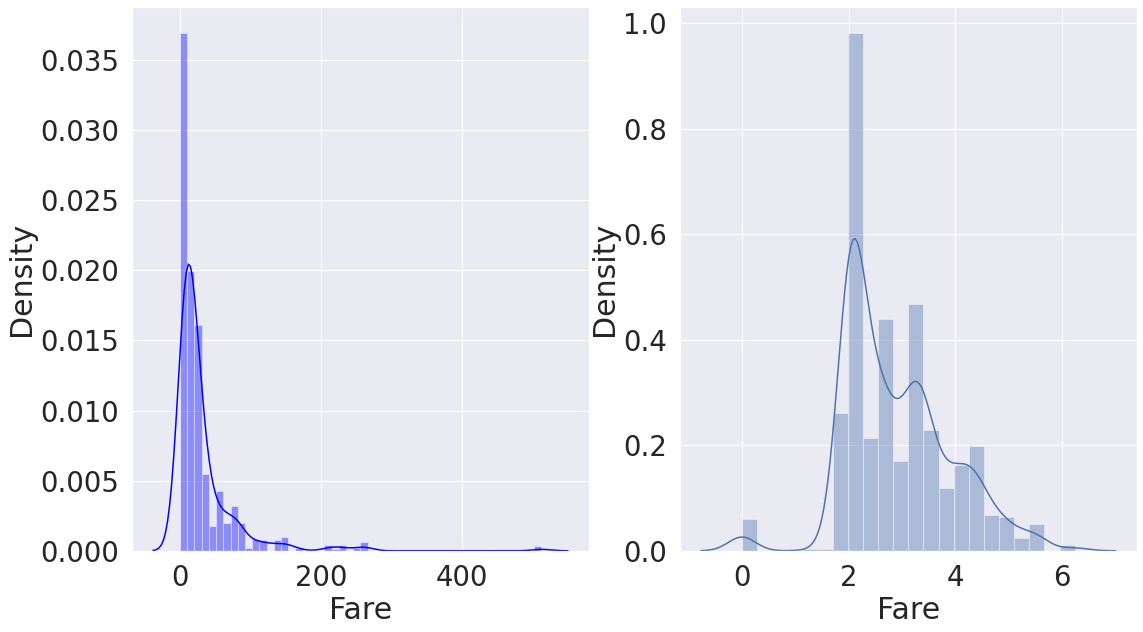

* 최초 작성 일자 : 21.10.06
* 1회차 복습 일자 :
* 2회차 복습 일자 :
* 3회차 복습 일자 : 
* 4회차 복습 일자 : 
* 5회차 복습 일자 : 